In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications, optimizers, Input, Model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import matplotlib
print(np.__version__)
print(sns.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.20.1
0.11.1
1.2.4
3.3.4


In [2]:
train_path = "../Dataset/Training_Set/"
validation_path = "../Dataset/Validation_Set/"
test_path = "../Dataset/Test_Set/"

In [3]:
img_height = 224
img_width = 224
batch_size = 64

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, rotation_range=40, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width), batch_size=batch_size, shuffle=True, class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(validation_path, target_size=(img_height, img_width), class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size=(img_height, img_width), class_mode="categorical", batch_size = 1)

Found 5953 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
basemodel = applications.mobilenet_v2.MobileNetV2(weights='imagenet',input_shape=(img_height, img_width, 3), include_top=False)

basemodel.trainable  = False

inputs = Input(shape=(img_height, img_width, 3))

x = basemodel(inputs, training = False)

x = GlobalAveragePooling2D()(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs, output)

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [7]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
90/94 [===========================>..] - ETA: 4s - loss: 0.1469 - accuracy: 0.9445

C:\Anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - 114s 1s/step - loss: 0.1436 - accuracy: 0.9457 - val_loss: 0.0460 - val_accuracy: 0.9825
Epoch 2/5
94/94 [==============================] - 113s 1s/step - loss: 0.0778 - accuracy: 0.9756 - val_loss: 0.0452 - val_accuracy: 0.9825
Epoch 3/5
94/94 [==============================] - 111s 1s/step - loss: 0.0585 - accuracy: 0.9782 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 4/5
94/94 [==============================] - 120s 1s/step - loss: 0.0492 - accuracy: 0.9839 - val_loss: 0.0469 - val_accuracy: 0.9825
Epoch 5/5
94/94 [==============================] - 117s 1s/step - loss: 0.0545 - accuracy: 0.9820 - val_loss: 0.0272 - val_accuracy: 0.9925


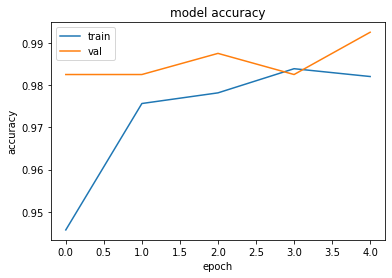

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

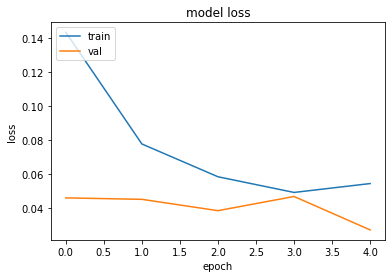

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.trainable = True

model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-5), loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [11]:
history1 = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
94/94 [==============================] - 336s 4s/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0243 - val_accuracy: 0.9912
Epoch 2/10
94/94 [==============================] - 336s 4s/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0301 - val_accuracy: 0.9912
Epoch 3/10
94/94 [==============================] - 335s 4s/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0227 - val_accuracy: 0.9937
Epoch 4/10
94/94 [==============================] - 336s 4s/step - loss: 0.0329 - accuracy: 0.9887 - val_loss: 0.0187 - val_accuracy: 0.9937
Epoch 5/10
94/94 [==============================] - 340s 4s/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0159 - val_accuracy: 0.9962
Epoch 6/10
94/94 [==============================] - 338s 4s/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0244 - val_accuracy: 0.9937
Epoch 7/10
94/94 [==============================] - 334s 4s/step - loss: 0.0136 - accuracy: 0.9968 - val_loss: 0.0190 - val_accuracy: 0.9962
Epoch 8/10
94

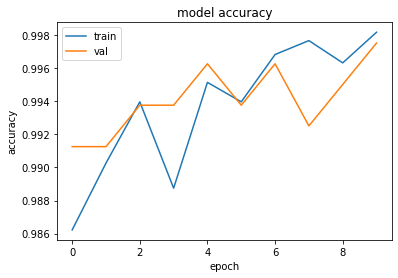

In [12]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

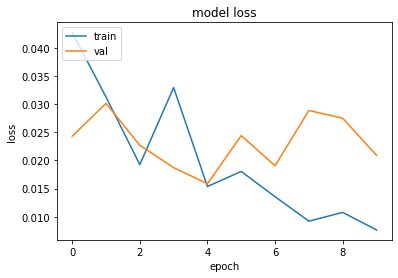

In [13]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
model_json = model.to_json()

# with open("../Model/model_json.json", "w") as json_file:
#     json_file.write(model_json)

# model.save_weights("../Model/model_weights.h5")

# model.save('../Model/model_hdf5.hdf5')

model.save("../Model/model_mobilenetv2.h5")

In [110]:
correct = 0
for i in range(800):
    feature = test_generator[i][0]
    label = np.argmax(np.round(test_generator[i][1]))
    pred = np.argmax(np.round(model.predict(feature)))
    if pred == label:
        correct = correct + 1

In [112]:
correct * 100 / 800

99.625